x axis = physical attributes
y axis = pie score

In [ ]:
#get physical attributes

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
physical_attributes = pd.read_csv ('/Users/josephhartono/Downloads/noEm.csv')
#data.drop('PLAYER_ID', inplace=True, axis=1)
physical_attributes.drop('FIRST_NAME_x', inplace=True, axis=1)
physical_attributes.drop('LAST_NAME_x', inplace=True, axis=1)
#physical_attributes.drop('PLAYER_NAME_x', inplace=True, axis=1)
physical_attributes.drop('HEIGHT_WO_SHOES_FT_IN', inplace=True, axis=1)
physical_attributes.drop('WINGSPAN_FT_IN', inplace=True, axis=1)
physical_attributes.drop('STANDING_REACH_FT_IN', inplace=True, axis=1)
#physical_attributes.drop('DRAFT_CLASS', inplace=True, axis=1)
#PG SG SF PF C
mapping = {'PG':1,'PG-SG':1,'PG-SF':1,'PG-PF':1,'PG-C':1,
           'SG':2,'SG-PG':2,'SG-SF':2,'SG-PF':2,'SG-C':2,
           'SF':3,'SF-PG':3,'SF-SG':3,'SF-PF':3,'SF-C':3,
           'PF':4,'PF-PG':4,'PF-SG':4,'PF-SF':4,'PF-C':4,
           'C':5,'C-PG':5,'C-SG':5,'C-SF':5,'C-PF':5}
physical_attributes = physical_attributes.replace({'POSITION_x':mapping})
#physical_attributes

In [5]:
point_guard = physical_attributes[physical_attributes['POSITION_x'] == 1.0]
#shooting_guard = data[data['POSITION_x'] == 2.0]
#small_forward = data[data['POSITION_x'] == 3.0]
#power_forward = data[data['POSITION_x'] == 4.0]
#center = data[data['POSITION_x'] == 5.0]


This dont work, cant get pie score so im gonna do

each position to see how much they get paid over the years


from nba_api.stats.endpoints import commonplayerinfo
LB = commonplayerinfo.CommonPlayerInfo(2544)
#LB = commonplayerinfo.AvailableSeasons(2544)

LB = commonplayerinfo.PlayerHeadlineStats(2544)
LB.get_data_frames()[0]

the wall I run into the most: the data isnt together SO, im going to mash up all the data together
What data do I have?



"noEM" physical attributes, first-last, draft class
"salaries 85-2016" salaries, player id,
"players" player id, draft round picks
nba_api draft round info, points

draft round info, name, salaries, physical attributes

pie score first 4 years - output
overall pick of draft - input

3 weeks left - realistic
presentation for wednesday

hope we could have done
what we have done
what we would like to do

In [6]:
from nba_api.stats.endpoints import commonplayerinfo
LB = commonplayerinfo.CommonPlayerInfo(2544)
LB.get_data_frames()[1]


,PLAYER_ID,PLAYER_NAME,TimeFrame,PTS,AST,REB,PIE
0,2544,LeBron James,2021-22,30.3,6.2,8.2,0.18


In [7]:
#physical_attributes

In [30]:
manual_pie = pd.read_csv ('/Users/josephhartono/Downloads/finished_joseph_csv_manual_pie - joseph_csv_manual_pie.csv')
#manual_pie

draft_data = pd.read_csv('draft_data_2000_2016.csv')
draft_data = draft_data[draft_data['DRAFT_CLASS'] == 2000]
draft_IDs = draft_data['PLAYER_ID']


# for ID in draft_IDs:
#     print(ID)
#draft_data = draft_data[draft_data['DRAFT_NUMBER'] > 0]

In [41]:
draft_data = pd.read_csv('draft_data_2000_2016_no_empty_cells.csv')
draft_data

,PLAYER_ID,FIRST_NAME_x,LAST_NAME_x,PLAYER_NAME_x,POSITION_x,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,DRAFT_CLASS
0,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',271.0,86.50,7' 2.5'',109.0,9' 1'',2000
1,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',219.0,80.50,6' 8.5'',103.0,8' 7'',2000
2,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',235.5,87.50,7' 3.5'',108.0,9' 0'',2000
3,12131,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',287.0,84.00,7' 0'',103.0,8' 7'',2000
4,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',243.0,86.00,7' 2'',110.0,9' 2'',2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1627756,Denzel,Valentine,Denzel Valentine,SG-SF,76.00,6' 4'',210.4,82.75,6' 10.75'',102.0,8' 6'',2016
1060,1627785,Isaiah,Whitehead,Isaiah Whitehead,PG-SG,75.25,6' 3.25'',210.0,80.75,6' 8.75'',100.0,8' 4'',2016
1061,1627786,Troy,Williams,Troy Williams,SF,77.75,6' 5.75'',217.8,80.25,6' 8.25'',102.0,8' 6'',2016
1062,1627787,Kyle,Wiltjer,Kyle Wiltjer,PF,80.75,6' 8.75'',242.8,84.25,7' 0.25'',102.5,8' 6.5'',2016


error so skip


In [48]:
draft_data = pd.read_csv('draft_data_2000_2016_no_empty_cells.csv')


def select_draft_year(year):
    year_data = draft_data[draft_data['DRAFT_CLASS'] == year]
    return year_data['PLAYER_ID']
    

ids_for_year = select_draft_year(2000)

all_common_player_info = []

for ID in ids_for_year:
    try:
        info = commonplayerinfo.CommonPlayerInfo(12020).get_data_frames()[0]
        all_common_player_info.append(info)
    except Exception:
        print("error so skip")
    
    
all_common_player_info

error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip
error so skip


[]

In [49]:
all_common_player_info

[]

In [20]:
from nba_api.stats.endpoints import commonplayerinfo
info = commonplayerinfo.CommonPlayerInfo(2074).get_data_frames()[0]
info

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,2074,Jabari,Smith,Jabari Smith,"Smith, Jabari",J. Smith,jabari-smith,1977-02-12T00:00:00,Louisiana State,USA,...,jabari_smith,2000,2004,N,Y,Y,2000,2,45,N


In [24]:
from nba_api.stats.endpoints import commonplayerinfo

all_common_player_info = []

def getCommonPlayerInfo(inputID):
    info = commonplayerinfo.CommonPlayerInfo(inputID).get_data_frames()[0]
    all_common_player_info.append(info)

,PLAYER_ID,FIRST_NAME_x,LAST_NAME_x,PLAYER_NAME_x,POSITION_x,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,DRAFT_CLASS,DRAFT_ROUND,DRAFT_NUMBER
0,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',271.0,86.50,7' 2.5'',109.0,9' 1'',2000,-1,-1
1,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',219.0,80.50,6' 8.5'',103.0,8' 7'',2000,-1,-1
2,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',235.5,87.50,7' 3.5'',108.0,9' 0'',2000,-1,-1
3,12131,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',287.0,84.00,7' 0'',103.0,8' 7'',2000,-1,-1
4,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',243.0,86.00,7' 2'',110.0,9' 2'',2000,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1627756,Denzel,Valentine,Denzel Valentine,SG-SF,76.00,6' 4'',210.4,82.75,6' 10.75'',102.0,8' 6'',2016,1,14
1060,1627785,Isaiah,Whitehead,Isaiah Whitehead,PG-SG,75.25,6' 3.25'',210.0,80.75,6' 8.75'',100.0,8' 4'',2016,2,42
1061,1627786,Troy,Williams,Troy Williams,SF,77.75,6' 5.75'',217.8,80.25,6' 8.25'',102.0,8' 6'',2016,-1,-1
1062,1627787,Kyle,Wiltjer,Kyle Wiltjer,PF,80.75,6' 8.75'',242.8,84.25,7' 0.25'',102.5,8' 6.5'',2016,-1,-1


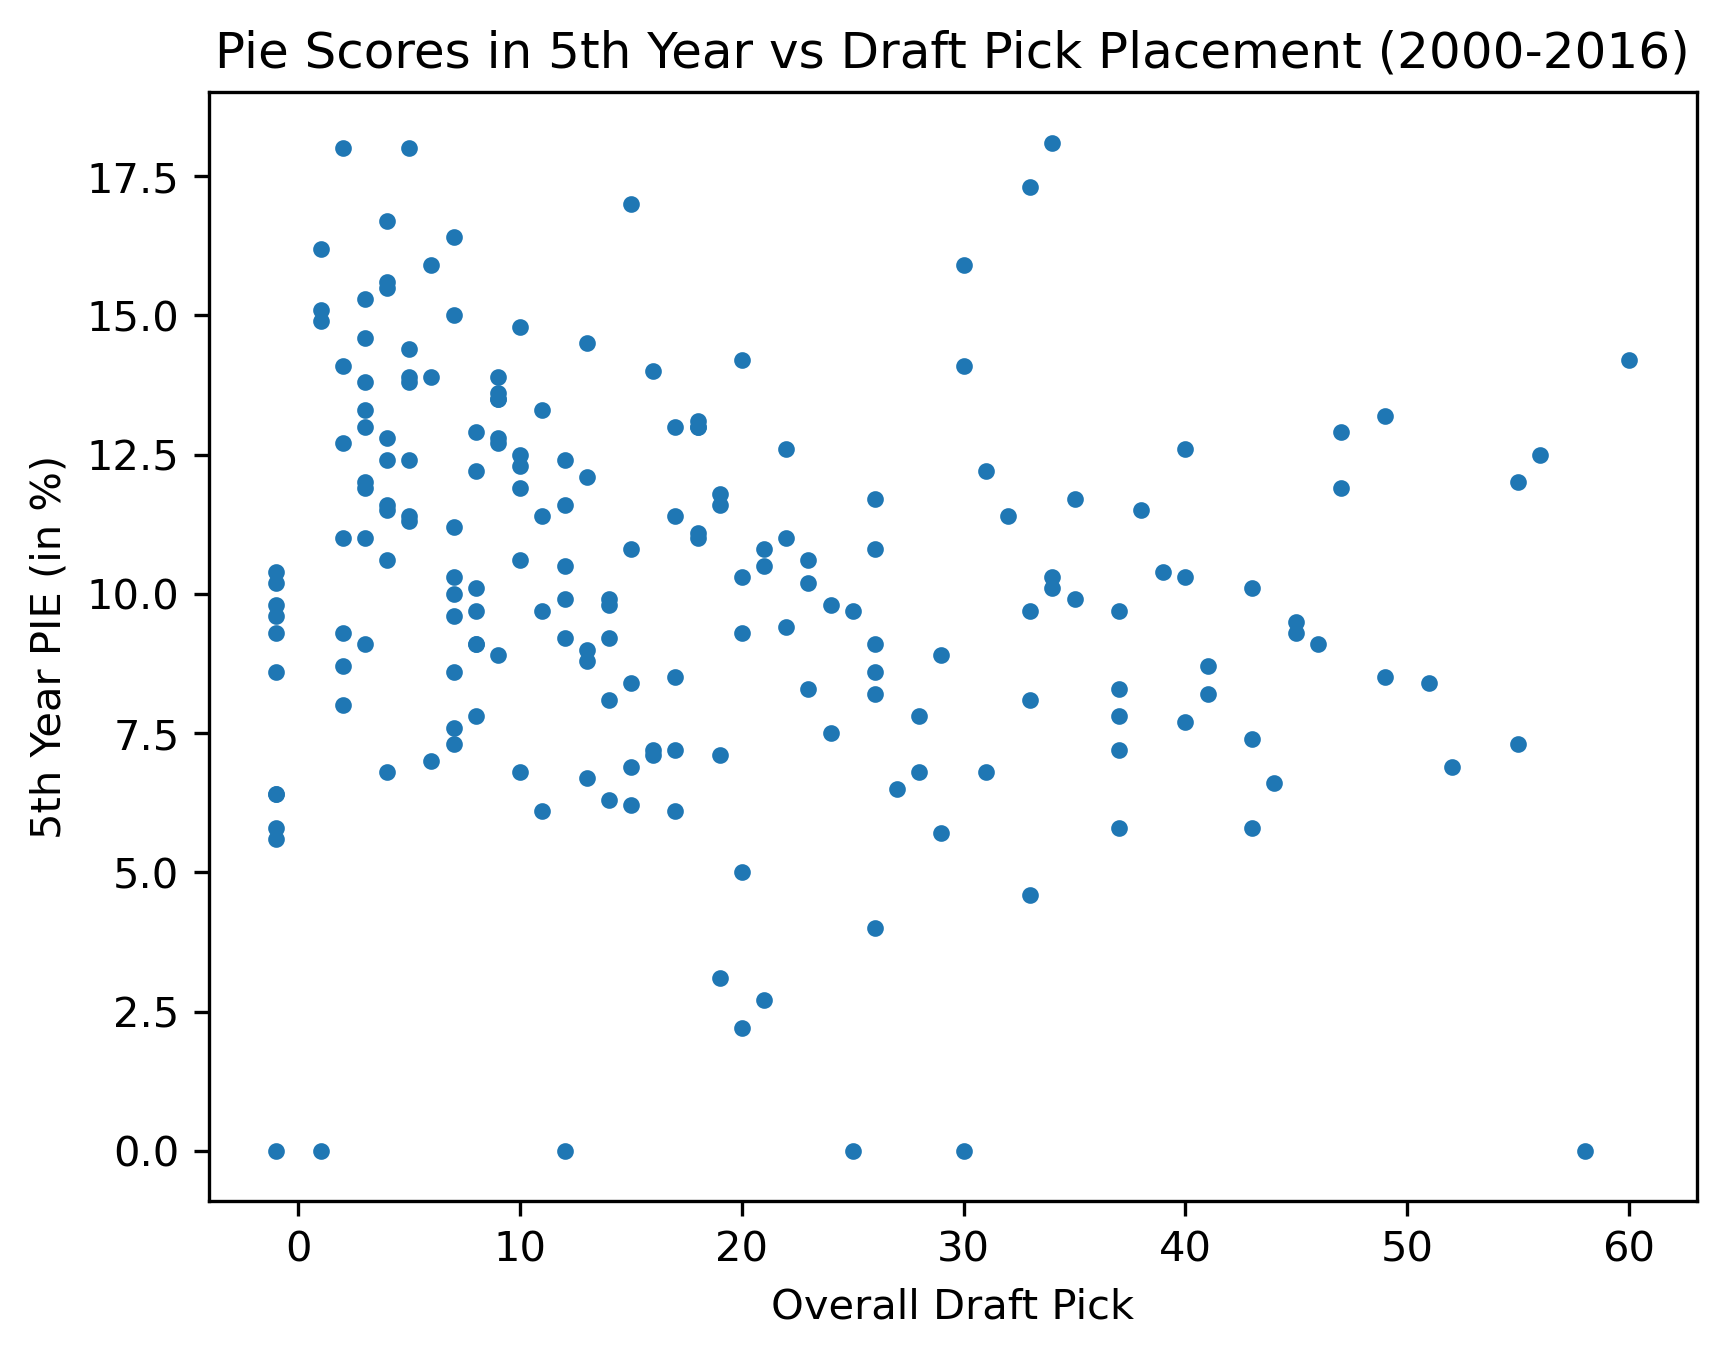

In [22]:
from nba_api.stats.endpoints import commonplayerinfo
import matplotlib.pyplot as plt
import pandas as pd
draft_pick_data = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_data_2000_2016_no_empty_cells_w_draft_pick.csv')
draft_pie_data = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_nba_data_2000_2016_w_PIE_and_salaries_and college_stats.csv')


draft_pie_data = draft_pie_data[draft_pie_data['5th_YR_SALARY_TAG'] != "no contract"]
#draft_pick_data = draft_pick_data[draft_pick_data['DRAFT_NUMBER'] != -1]
display(draft_pick_data)

draft_pie_names = draft_pie_data['PLAYER_NAME_x'].values
#print(draft_pie_names)
#picks = draft_pick_data[draft_pick_data.isn(draft_pie_names)].values
picks = []
pie = draft_pie_data['PIE_5_YR'].values
for name in draft_pie_names:
    pick = draft_pick_data[(draft_pick_data.PLAYER_NAME_x == name)]
    #print(name)
    picks.append(pick['DRAFT_NUMBER'].values[0])

#print(len(picks))
plt.figure(dpi=300)
plt.plot(picks, pie , marker='o', linestyle='', markersize=3, label=name)

plt.title("Pie Scores in 5th Year vs Draft Pick Placement (2000-2016)")
plt.xlabel('Overall Draft Pick')
plt.ylabel('5th Year PIE (in %)')
plt.show()

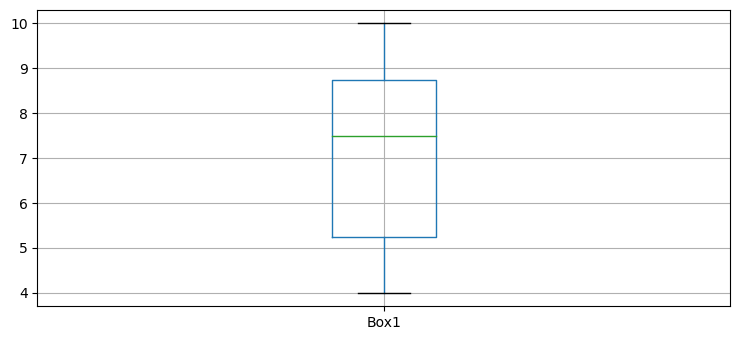

In [29]:
# import pandas as pd
# import numpy as np
# from matplotlib import pyplot as plt
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
# data = pd.DataFrame({"Box1": [9,8,5,4,5,6,7,8,9,10]})
# data.boxplot()
# # for i, d in enumerate(data):
# #    y = data[d]
# #    x = np.random.normal(i + 1, 0.04, len(y))
# #    plt.scatter(x, y)
# plt.show()